<a href="https://colab.research.google.com/github/ashukesharwani/paper1/blob/main/After_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **After Box-Cox Transformation**

In [83]:
import pandas as pd
import numpy as np
# plt.rcParams['figure.figsize']=(10.0,7.0)

In [84]:
df=pd.read_excel('/content/Crop Datasets.xlsx')
df

,Year,Area,Production,Yield
0,1950-51,30.81,20.58,668
1,1951-52,29.83,21.30,714
2,1952-53,29.97,22.90,764
3,1953-54,31.29,28.21,902
4,1954-55,30.77,25.22,820
...,...,...,...,...
64,2014-15,44.11,105.48,2391
65,2015-16,43.49,104.40,2400
66,2016-17,43.99,109.69,2494
67,2017-18,43.77,112.75,2576


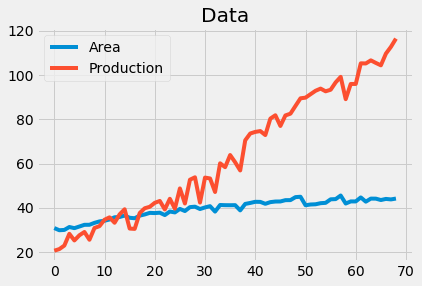

In [85]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(df['Area'],label="Area")
plt.plot(df['Production'],label="Production")
plt.title("Data")
plt.legend()

# **BoxCox**

In [86]:
#Box Cox Transformation
from scipy.stats import boxcox 
import seaborn as sns 

#Perform Box-Cox transformation on original data
transformed_data_1, best_lambda_1 = boxcox(df['Area']) 
transformed_data_2, best_lambda_2 = boxcox(df["Production"])

print("Lambda X: ",best_lambda_1)
print("Lambda Y: ",best_lambda_2)
X=transformed_data_1
# X=df['Area'].values
Y=transformed_data_2
m=len(X)


Lambda X:  4.406125699819205
Lambda Y:  0.37822291158968396


In [87]:
print(X)
print(Y)

[ 822821.72248365  713592.99331972  728467.85192101  880821.46349185
  818125.26132572  909708.42534916 1010401.09491508 1013162.34348191
 1139039.3707796  1240721.05040231 1291618.45607369 1387639.95034029
 1572744.95126911 1596178.40904716 1727840.31612553 1530475.09398406
 1489088.86899385 1723668.087085   1836897.06919338 1997495.38353557
 1976558.71921825 2016249.30032782 1776384.36953133 2143957.58367834
 2047014.41151524 2453473.87481982 2198767.46339192 2680211.14645276
 2739345.24710209 2437087.29476749 2642306.50873579 2808590.86135775
 2136566.13634007 2973309.58177424 2947979.68288187 2941673.35379285
 2951136.76392508 2275246.70340112 3132148.60432101 3280297.37151774
 3462302.89253959 3448031.61837735 3148718.01453173 3409020.00129074
 3505390.84376842 3516227.30993444 3734658.95734923 3742242.78797062
 4282344.37581536 4354407.90138565 2938524.10269483 3047071.13856109
 3079579.02930484 3242762.95697161 3297469.07749624 3880799.36751424
 3919981.93798764 4598444.94033674

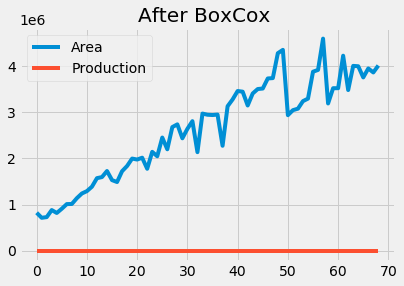

In [88]:
plt.style.use('fivethirtyeight')
plt.plot(X,label="Area")
plt.plot(Y,label="Production")
plt.title("After BoxCox ")

plt.legend()

# **Linear Regression**

In [89]:
# inbuit function
from sklearn.linear_model import LinearRegression

# cannot use Rank 1 matrix in scikit learn
X=X.reshape((m ,1))

# Splitting dataset into training and testing sets
# Xx_train, Xx_test, Yy_train, Yy_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

#creating Model
reg=LinearRegression()

#fitting traingin data
reg=reg.fit(X, Y)
print("Y-intercept :"  , reg.intercept_)
print("Slope :" , reg.coef_)
print("\n")


#Y prediction
Y_pred=reg.predict(X)
print("Y_Predicted Values : ")
Y_pred


Y-intercept : 4.465119645620747
Slope : [1.99147946e-06]


Y_Predicted Values : 


array([ 6.10375221,  5.88622544,  5.91584841,  6.2192575 ,  6.0943993 ,
        6.27678529,  6.47731268,  6.48281165,  6.73349316,  6.93599014,
        7.03735128,  7.22857611,  7.59720892,  7.64387617,  7.90607815,
        7.51302937,  7.43060955,  7.89776924,  8.12326244,  8.44309068,
        8.40139575,  8.48043872,  8.00275264,  8.73476715,  8.54170681,
        9.35116248,  8.8439199 ,  9.8027051 ,  9.92046945,  9.31852895,
        9.7272188 , 10.05837067,  8.72004723, 10.38640462, 10.33596065,
       10.32340172, 10.34224791,  8.99622673, 10.70272927, 10.9977645 ,
       11.36022476, 11.33180381, 10.73572691, 11.25411297, 11.44603353,
       11.46761413, 11.90261627, 11.91771931, 12.99332053, 13.13683356,
       10.31713005, 10.53329925, 10.59803804, 10.92301548, 11.0319616 ,
       12.19365189, 12.27168318, 13.62282831, 10.82215252, 11.48202982,
       11.48202982, 12.88481969, 11.40302659, 12.44549562, 12.42957202,
       11.94799651, 12.33454555, 12.16260877, 12.46144381])

Text(0.5, 1.0, 'Simple Linear Regression  Line After Box-Cox Transformation')

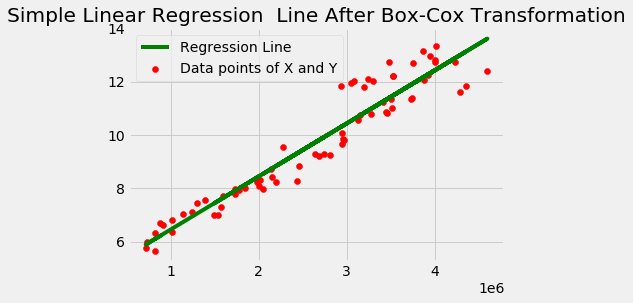

In [90]:
plt.style.use('fivethirtyeight')
plt.scatter(X, Y, color = 'red',label="Data points of X and Y")
plt.plot(X,Y_pred, color = 'green',label="Regression Line")
plt.legend()
plt.title("Simple Linear Regression  Line After Box-Cox Transformation")

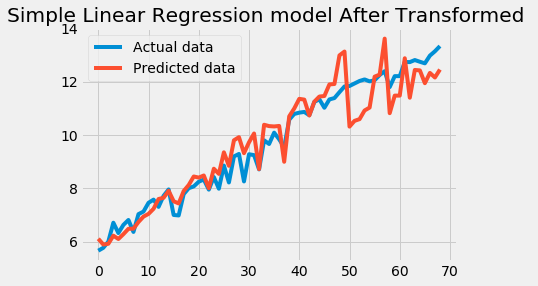

In [91]:
plt.style.use('_classic_test_patch')
plt.plot(Y,label="Actual data")
plt.plot(Y_pred,label="Predicted data")
plt.title("Simple Linear Regression model After Transformed ")
plt.legend()

In [92]:
#Calculation the Model Performance for Linear Regression

#R_Squared
r2_score=reg.score(X,Y)
print(f"R Square:- {r2_score}")

from sklearn.metrics import r2_score
r2 = r2_score(Y, Y_pred)
print('r2 score for perfect model is', r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error:- {mse}")


#Root mean square error
rmse=np.sqrt(mse)
print(f"Root mean square error:- {rmse}")


#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error:- {mae}")

#Mean Absolute Percentage  Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(Y, Y_pred)
print("Mean Absolute Percentage Error:-",LR_MAPE)

#Teil's U Statistic
def u1(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

U1= u1(Y_pred,Y)
print("Teil's U1 Statistic:-",U1)

def u2(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

U2= u2(Y_pred,Y)
print("Teil's U2 Statistic:-",U2)


R Square:- 0.9154888300497362
r2 score for perfect model is 0.9154888300497362
Mean Squared Error:- 0.4222707765444117
Root mean square error:- 0.6498236503424693
Mean Absolute Error:- 0.5116077941187827
Mean Absolute Percentage Error:- 5.0777429469549284
Teil's U1 Statistic:- 0.03260458933950656
Teil's U2 Statistic:- 1.155383222561199


# **Bayesian Regression**

In [93]:
X_b=X
Y_b=Y

In [94]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# cannot use Rank 1 matrix in scikit learn
# X=X.reshape((m ,1))

# Splitting dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
# Creating and training model

model = BayesianRidge()
model.fit(X_b, Y_b)
   
# Model making a prediction on test data
prtn = model.predict(X_b)
print("Y_Predicted Values : ")
print(prtn)

Y_Predicted Values : 
[ 6.10375222  5.88622545  5.91584842  6.21925751  6.09439931  6.2767853
  6.47731269  6.48281166  6.73349317  6.93599015  7.03735128  7.22857612
  7.59720892  7.64387617  7.90607816  7.51302937  7.43060956  7.89776925
  8.12326244  8.44309069  8.40139575  8.48043873  8.00275264  8.73476715
  8.54170681  9.35116249  8.8439199   9.8027051   9.92046945  9.31852895
  9.7272188  10.05837067  8.72004723 10.38640462 10.33596064 10.32340172
 10.34224791  8.99622673 10.70272927 10.9977645  11.36022475 11.3318038
 10.73572691 11.25411297 11.44603352 11.46761412 11.90261626 11.9177193
 12.99332052 13.13683355 10.31713005 10.53329924 10.59803804 10.92301548
 11.0319616  12.19365189 12.27168317 13.6228283  10.82215252 11.48202981
 11.48202981 12.88481968 11.40302658 12.44549561 12.42957201 11.94799651
 12.33454554 12.16260877 12.4614438 ]


Text(0.5, 1.0, 'Bayesian Regression  Line After Box-Cox Transformation')

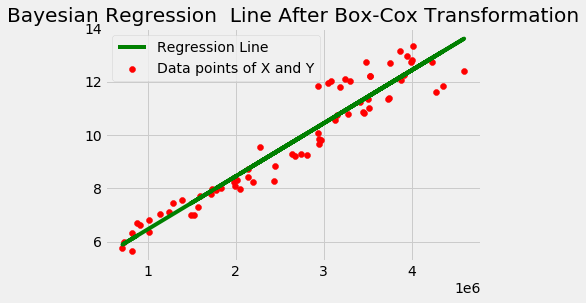

In [95]:
plt.style.use('fivethirtyeight')
plt.scatter(X, Y, color = 'red',label="Data points of X and Y")
plt.plot(X,prtn, color = 'green',label="Regression Line")
plt.legend()
plt.title("Bayesian Regression  Line After Box-Cox Transformation")

In [96]:
pred_yX = np.power((Y_pred * best_lambda_2) + 1, 1 / best_lambda_2)
pred_yX

array([ 23.65389988,  22.13036084,  22.33413568,  24.48866542,
        23.58709225,  24.91115738,  26.41918247,  26.4613146 ,
        28.42658281,  30.07849612,  30.92725916,  32.56871124,
        35.88346181,  36.31740724,  38.81621271,  35.10888359,
        34.36065347,  38.73543812,  40.96483244,  44.26107547,
        43.8223442 ,  44.65637682,  39.7637343 ,  47.40667295,
        45.30959463,  54.50231646,  48.61852951,  60.096041  ,
        61.6111041 ,  54.11115551,  59.13720086,  63.41514616,
        47.24470018,  67.83749916,  67.14536185,  66.9737277 ,
        67.23138814,  50.34140804,  72.27893972,  76.58045877,
        82.07836589,  81.63868522,  72.75236992,  80.44426729,
        83.41477655,  83.7529932 ,  90.75313496,  91.00247299,
       109.87090793, 112.55709197,  66.88811938,  69.87823738,
        70.7895897 ,  75.47600202,  77.089069  ,  95.63306741,
        96.96855822, 121.95553205,  74.00147601,  83.97939384,
        83.97939384, 107.8667732 ,  82.74329647,  99.98

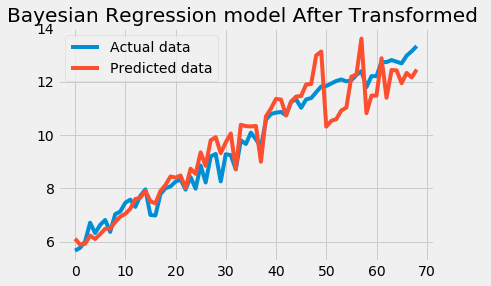

In [97]:
plt.style.use('_classic_test_patch')
plt.plot(Y_b,label="Actual data")
plt.plot(prtn,label="Predicted data")
plt.title("Bayesian Regression model After Transformed ")
plt.legend()

In [98]:
#Reverse BoxCox
pred_yt = np.power((prtn * best_lambda_2) + 1, 1 / best_lambda_2)
pred_yt

array([ 23.65389995,  22.13036091,  22.33413575,  24.48866549,
        23.58709232,  24.91115745,  26.41918253,  26.46131466,
        28.42658287,  30.07849619,  30.92725922,  32.5687113 ,
        35.88346186,  36.31740729,  38.81621276,  35.10888364,
        34.36065352,  38.73543817,  40.96483248,  44.26107551,
        43.82234424,  44.65637685,  39.76373434,  47.40667298,
        45.30959466,  54.50231647,  48.61852954,  60.096041  ,
        61.6111041 ,  54.11115552,  59.13720086,  63.41514614,
        47.24470021,  67.83749913,  67.14536183,  66.97372768,
        67.23138811,  50.34140807,  72.27893969,  76.58045872,
        82.07836582,  81.63868515,  72.75236988,  80.44426722,
        83.41477648,  83.75299312,  90.75313486,  91.00247289,
       109.87090777, 112.5570918 ,  66.88811935,  69.87823735,
        70.78958967,  75.47600197,  77.08906895,  95.6330673 ,
        96.9685581 , 121.95553184,  74.00147597,  83.97939377,
        83.97939377, 107.86677305,  82.7432964 ,  99.98

In [99]:
#Calculation the Model Performance for Bayesian Regression

#R_Squared
rt2_score=reg.score(X_b, Y_b)
print(f"R Square:  {rt2_score}")

from sklearn.metrics import r2_score
rt2 = r2_score(Y_b, prtn)
print('r2 score for perfect model is', rt2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_b, prtn)
print(f"Mean Squared Error: {mse}")


#Root mean square error
rmse=np.sqrt(mse)
print(f"Root mean square error: {rmse}")


#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(Y_b, prtn)
print(f"Mean Absolute Error: {mae}")

#Mean Absolute Percentage  Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(Y_b, prtn)
print("Mean Absolute Percentage Error: ",LR_MAPE)

#Teil's U Statistic
def u1(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

U1= u1(prtn,Y_b)
print("Teil's U1 Statistic: ",U1)

def u2(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

U2= u2(prtn,Y_b)
print("Teil's U2 Statistic: ",U2)

R Square:  0.9154888300497362
r2 score for perfect model is 0.9154888300497362
Mean Squared Error: 0.4222707765444117
Root mean square error: 0.6498236503424693
Mean Absolute Error: 0.5116077936783178
Mean Absolute Percentage Error:  5.077742941606789
Teil's U1 Statistic:  0.03260458934153023
Teil's U2 Statistic:  1.155383221197254
